In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
from wordcloud import WordCloud

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
df_processed = pd.read_pickle("../data/processed_chat_data.pkl")
print("Processed dataframe shape: ", df_processed.shape)
df_processed.head()

Processed dataframe shape:  (11760, 23)


,transcript_id,article_url,config,message,agent,sentiment,knowledge_source,turn_rating,conversation_rating_agent1,conversation_rating_agent2,...,turn_rating_encoded,config_encoded,ks_AS1,ks_AS2,ks_AS3,ks_AS4,ks_FS1,ks_FS2,ks_FS3,ks_Personal Knowledge
0,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,C,Did you know that the University of Iowa's loc...,agent_1,Curious to dive deeper,"(FS1,)",Good,Good,Good,...,2,2,0,0,0,0,1,0,0,0
1,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,C,I think I did hear something about that. I im...,agent_2,Neutral,"(FS1,)",Good,Good,Good,...,2,2,0,0,0,0,1,0,0,0
2,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,C,"So, it would be in the visiting team's locker ...",agent_1,Curious to dive deeper,"(FS1,)",Good,Good,Good,...,2,2,0,0,0,0,1,0,0,0
3,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,C,Right. Teams do all kinds of things to bother...,agent_2,Neutral,"(FS1,)",Good,Good,Good,...,2,2,0,0,0,0,1,0,0,0
4,t_d004c097-424d-45d4-8f91-833d85c2da31,https://www.washingtonpost.com/sports/colleges...,C,"I would hate a cold bench. Then again, I would...",agent_1,Neutral,"(Personal Knowledge,)",Good,Good,Good,...,2,2,0,0,0,0,0,0,0,1


In [4]:
print("\n--- Dataset Fields and Info ---\n")
df_processed.info()


--- Dataset Fields and Info ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   transcript_id               11760 non-null  object  
 1   article_url                 11760 non-null  object  
 2   config                      11760 non-null  category
 3   message                     11760 non-null  object  
 4   agent                       11760 non-null  category
 5   sentiment                   11760 non-null  category
 6   knowledge_source            11760 non-null  object  
 7   turn_rating                 11760 non-null  category
 8   conversation_rating_agent1  11760 non-null  object  
 9   conversation_rating_agent2  11760 non-null  object  
 10  message_processed           11760 non-null  object  
 11  agent_encoded               11760 non-null  int64   
 12  sentiment_encoded           11760 non-nu

In [7]:
print("\n--- Statistical Summary (Numerical) ---\n")
df_processed.describe()


--- Statistical Summary (Numerical) ---



,agent_encoded,sentiment_encoded,turn_rating_encoded,config_encoded,ks_AS1,ks_AS2,ks_AS3,ks_AS4,ks_FS1,ks_FS2,ks_FS3,ks_Personal Knowledge
count,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000,11760.000000
mean,0.484014,3.166667,1.617517,2.097024,0.111139,0.033163,0.027551,0.020493,0.322874,0.271088,0.194388,0.267262
std,0.499766,2.250367,0.834538,1.126730,0.314318,0.179070,0.163689,0.141686,0.467595,0.444541,0.395745,0.442549
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,5.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,7.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
print("\n--- Statistical Summary (Categorical/Object) ---\n")
df_processed.describe(include=['object', 'category'])


--- Statistical Summary (Categorical/Object) ---



,transcript_id,article_url,config,message,agent,sentiment,knowledge_source,turn_rating,conversation_rating_agent1,conversation_rating_agent2,message_processed
count,11760,11760,11760,11760,11760,11760,11760,11760,11760,11760,11760
unique,539,99,4,11595,2,8,95,6,5,4,11341
top,t_b0f8601a-cd27-4492-bbfa-efbf0eea8c73,https://www.washingtonpost.com/local/for-tom-b...,D,"Hi there, do you watch the NFL?",agent_1,Curious to dive deeper,"(FS1,)",Excellent,Excellent,Excellent,
freq,33,5032,6353,17,6068,5542,2744,6011,6453,6898,39


Summary of fields:
* transcript\_id: Unique identifier for each conversation, with a total of 539 transcripts in the dataset.
* article\_url: URL of the Washington Post article discussed, covering conversations on 99 distinct articles.
* config: Configuration type for the conversation, categorized as A, B, C, or D.
* message: Raw text content of the message sent by an agent.
* agent: Identifier of the message sender, labeled as either agent\_1 or agent\_2.
* sentiment: Emotional tone of the message, chosen from 8 possible sentiment categories (e.g., Neutral, Curious, Sad).
* knowledge\_source: Information source(s) used in the message, with 8 distinct types (e.g., FS1, AS1, Personal Knowledge).
* turn\_rating: Quality rating of the individual message or turn, selected from 6 available rating levels (e.g., Good, Excellent).
* conversation\_rating\_agent1: Overall quality rating of agent\_1’s performance throughout the conversation, with 5 possible rating categories.
* conversation\_rating\_agent2: Overall quality rating of agent\_2’s performance throughout the conversation, also using 5 rating categories.
* message\_processed: Preprocessed version of the original message text.
* \<categorical>_encoded: Label-encoded versions of categorical columns for analysis or modeling.
* ks_<source\_name>: One-hot encoded columns indicating the presence of specific knowledge sources.

# OVERALL DISTRIBUTIONS

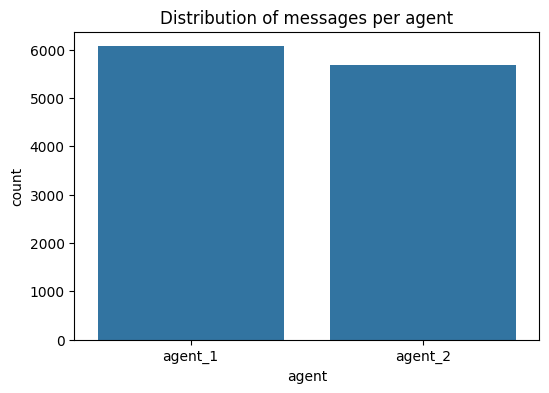

In [9]:
# Agent distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_processed, x='agent')
plt.title("Distribution of messages per agent")
plt.show()

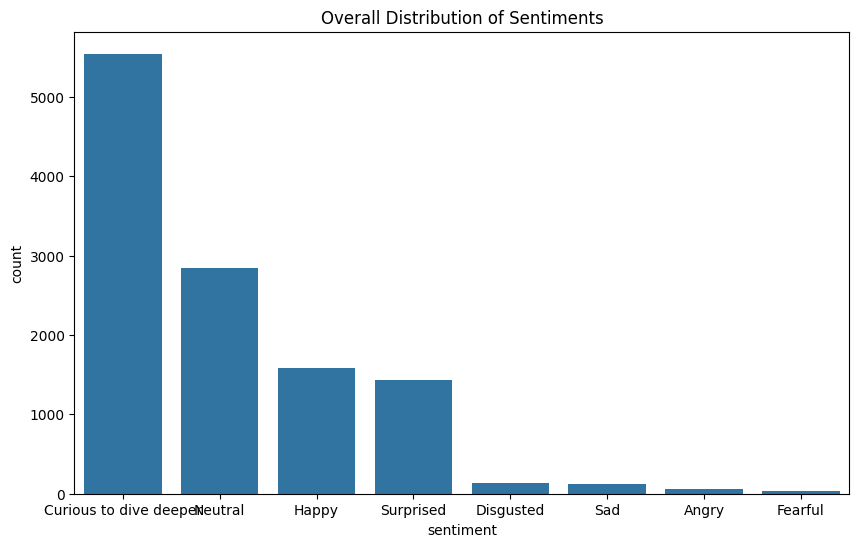

In [11]:
# Sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df_processed, x='sentiment', order=df_processed['sentiment'].value_counts().index)
plt.title('Overall Distribution of Sentiments')
plt.show()

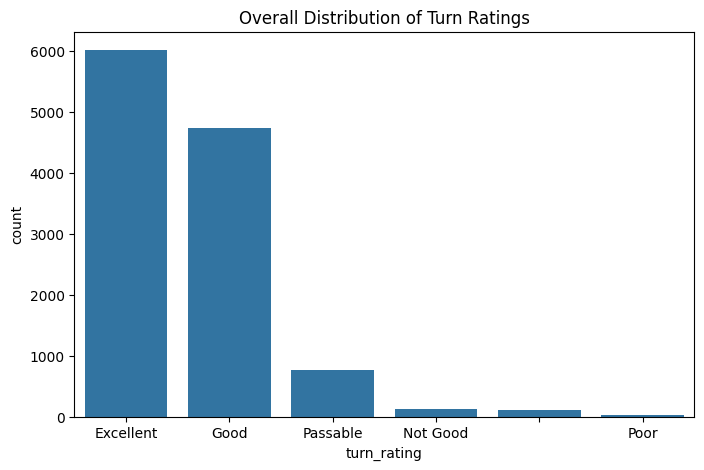

In [12]:
# Turn rating distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df_processed, x='turn_rating', order=df_processed['turn_rating'].value_counts().index)
plt.title('Overall Distribution of Turn Ratings')
plt.show()

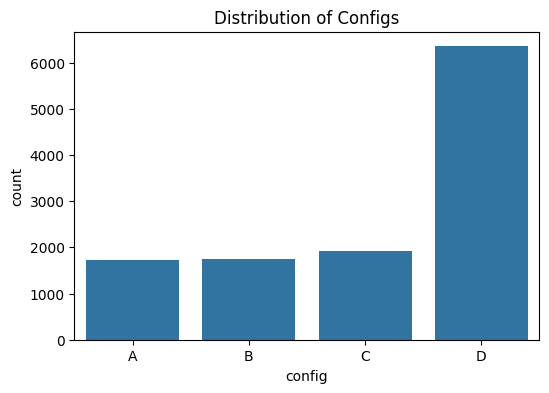

In [13]:
# Config distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df_processed, x='config')
plt.title('Distribution of Configs')
plt.show()

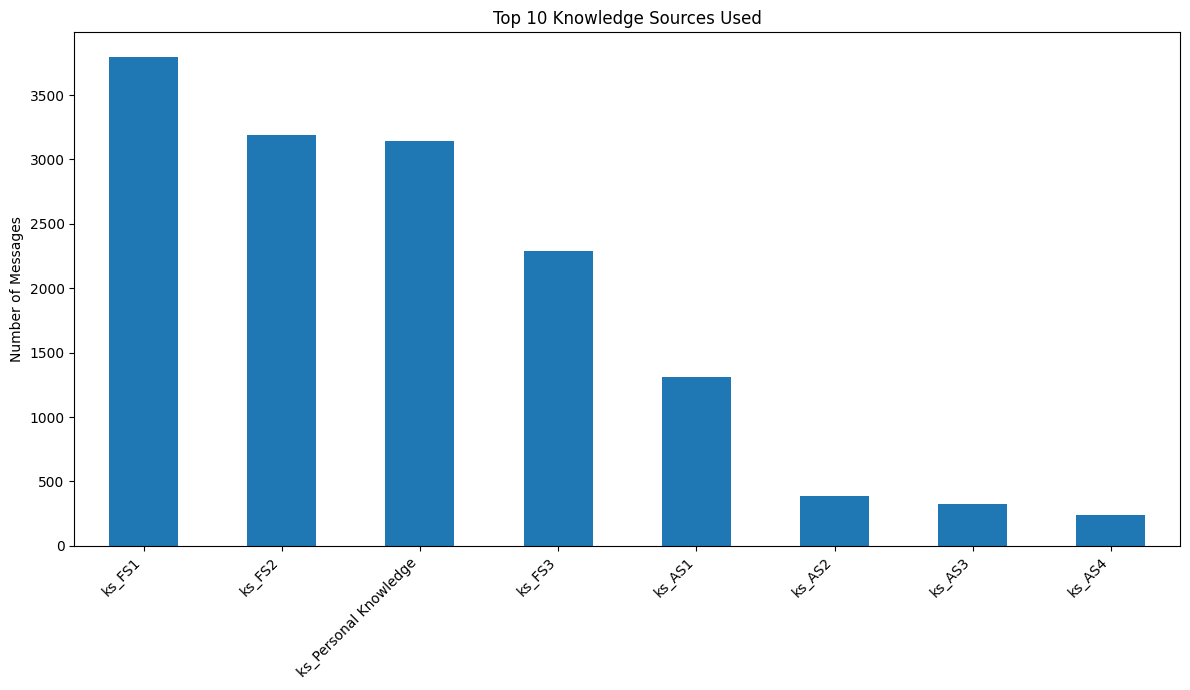

In [21]:
# Knowledge Source distribution
ks_columns = [col for col in df_processed.columns if col.startswith('ks_')]
ks_counts = df_processed[ks_columns].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 7))
ks_counts.plot(kind='bar')
plt.title('Top 10 Knowledge Sources Used')
plt.ylabel('Number of Messages')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

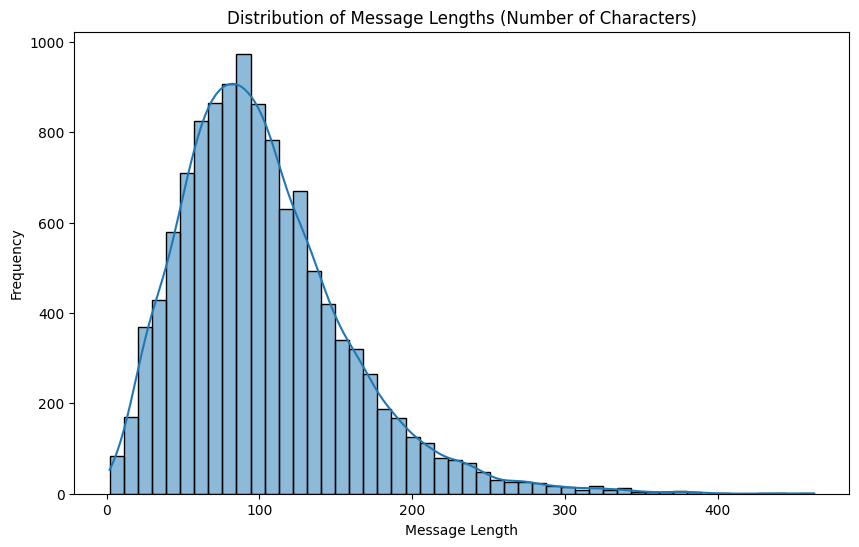

In [22]:
# Message length distribution
df_processed['message_length'] = df_processed['message'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df_processed['message_length'], bins=50, kde=True)
plt.title('Distribution of Message Lengths (Number of Characters)')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

# ARTICLE-WISE SUMMARIES

In [32]:
article_summary = df_processed.groupby('transcript_id').agg(
    article_url=('article_url', 'first'),
    num_messages=('message', 'count'),
    avg_message_length=('message_length', 'mean'),
    total_message_chars=('message_length', 'sum'),
    unique_agents=('agent', 'nunique'),
    config=('config', 'first'),
    sentiments=('sentiment', lambda x: list(x.value_counts().index)),
    sentiment_counts=('sentiment', lambda x: list(x.value_counts().values)),
    overall_sentiment=('sentiment', lambda x: x.mode()[0]),
    turn_ratings=('turn_rating', lambda x: list(x.value_counts().index)),
    turn_rating_counts=('turn_rating', lambda x: list(x.value_counts().values)),
    convo_rating_agent1=('conversation_rating_agent1', 'first'),
    convo_rating_agent2=('conversation_rating_agent2', 'first')
).reset_index()

In [33]:
# Summarizing knowledge sources per article
ks_article_summary_list = []
for tid, group in df_processed.groupby('transcript_id'):
    ks_sum = group[ks_columns].sum()
    top_ks = ks_sum.nlargest(3).index.tolist() # Get top 3 KS for this article
    ks_article_summary_list.append({'transcript_id': tid, 'top_knowledge_sources': top_ks})
ks_article_df = pd.DataFrame(ks_article_summary_list)
article_summary = pd.merge(article_summary, ks_article_df, on='transcript_id', how='left')

In [34]:
print("\n--- Article-wise Summary ---\n")
article_summary.head()


--- Article-wise Summary ---



,transcript_id,article_url,num_messages,avg_message_length,total_message_chars,unique_agents,config,sentiments,sentiment_counts,overall_sentiment,turn_ratings,turn_rating_counts,convo_rating_agent1,convo_rating_agent2,top_knowledge_sources
0,t_0003e865-d0c7-4dbf-a2e1-ef4c1bb0d5e3,https://www.washingtonpost.com/local/for-tom-b...,21,75.809524,1592,2,D,"[Neutral, Curious to dive deeper, Disgusted, A...","[11, 10, 0, 0, 0, 0, 0, 0]",Neutral,"[Excellent, Good, , Not Good, Passable, Poor]","[18, 3, 0, 0, 0, 0]",Excellent,Excellent,"[ks_Personal Knowledge, ks_FS1, ks_FS2]"
1,t_0042caa4-2fda-4b1e-9f45-b62f815a59f2,https://www.washingtonpost.com/local/for-tom-b...,23,138.826087,3193,2,D,"[Curious to dive deeper, Neutral, Disgusted, A...","[12, 11, 0, 0, 0, 0, 0, 0]",Curious to dive deeper,"[Excellent, Good, , Not Good, Passable, Poor]","[22, 1, 0, 0, 0, 0]",Excellent,Excellent,"[ks_FS3, ks_Personal Knowledge, ks_FS1]"
2,t_01bdd1c2-46fa-4ad1-853f-cf59ef1fc2fc,https://www.washingtonpost.com/local/for-tom-b...,21,77.000000,1617,2,D,"[Curious to dive deeper, Neutral, Disgusted, A...","[15, 6, 0, 0, 0, 0, 0, 0]",Curious to dive deeper,"[Excellent, Good, , Not Good, Passable, Poor]","[11, 10, 0, 0, 0, 0]",Excellent,Good,"[ks_FS1, ks_Personal Knowledge, ks_FS2]"
3,t_0286e13f-801d-48cd-bfec-1dcd61f11aa9,https://www.washingtonpost.com/local/for-tom-b...,21,101.142857,2124,2,D,"[Curious to dive deeper, Neutral, Disgusted, F...","[13, 3, 2, 1, 1, 1, 0, 0]",Curious to dive deeper,"[Passable, Good, Excellent, , Not Good, Poor]","[11, 10, 0, 0, 0, 0]",Passable,Good,"[ks_FS1, ks_FS3, ks_AS1]"
4,t_02aed34d-1372-404a-865d-978c1bbef566,https://www.washingtonpost.com/sports/tennis/a...,21,87.571429,1839,2,B,"[Curious to dive deeper, Happy, Disgusted, Ang...","[11, 10, 0, 0, 0, 0, 0, 0]",Curious to dive deeper,"[Good, Excellent, , Not Good, Passable, Poor]","[11, 10, 0, 0, 0, 0]",Good,Excellent,"[ks_FS2, ks_FS3, ks_Personal Knowledge]"


## Visualizations for Article-wise Summary

C:\Users\haadi\AppData\Local\Temp\ipykernel_14012\2882880957.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_n_articles, x='num_messages', y='transcript_id', palette='viridis')


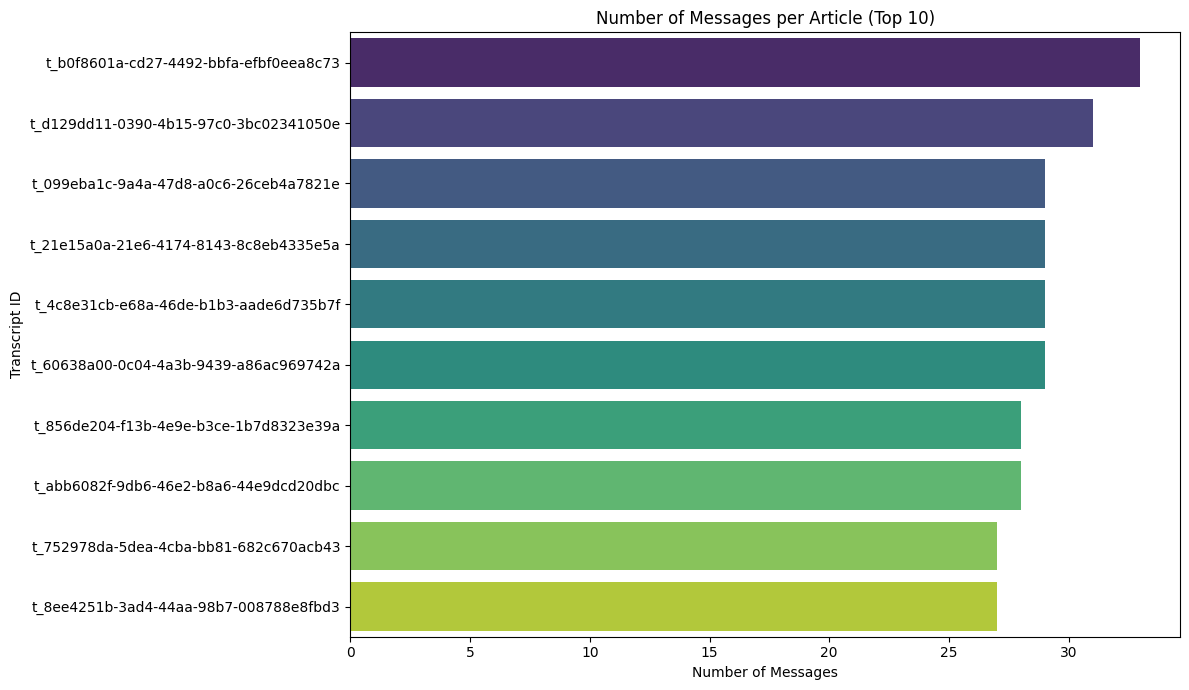

In [46]:
# Number of messages per article (showing top 10 longest conversations)
top_n_articles = article_summary.nlargest(10, 'num_messages')
plt.figure(figsize=(12, 7))
sns.barplot(data=top_n_articles, x='num_messages', y='transcript_id', palette='viridis')
plt.title('Number of Messages per Article (Top 10)')
plt.xlabel('Number of Messages')
plt.ylabel('Transcript ID')
plt.tight_layout()
plt.show()

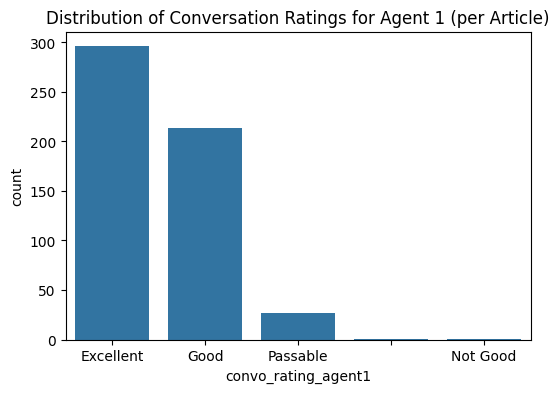

In [39]:
# Distribution of conversation ratings for Agent 1
plt.figure(figsize=(6,4))
sns.countplot(data=article_summary, x='convo_rating_agent1', order=article_summary['convo_rating_agent1'].value_counts().index)
plt.title('Distribution of Conversation Ratings for Agent 1 (per Article)')
plt.show()

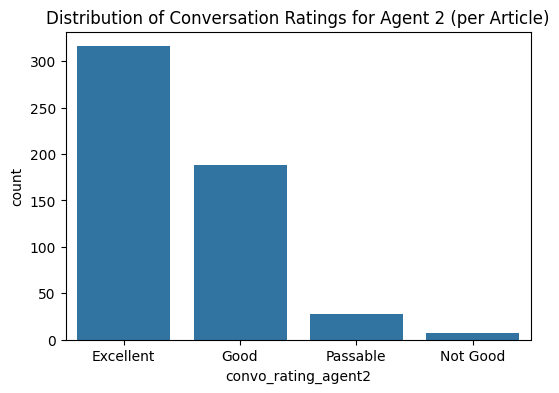

In [40]:
# Distribution of conversation ratings for Agent 2
plt.figure(figsize=(6,4))
sns.countplot(data=article_summary, x='convo_rating_agent2', order=article_summary['convo_rating_agent2'].value_counts().index)
plt.title('Distribution of Conversation Ratings for Agent 2 (per Article)')
plt.show()

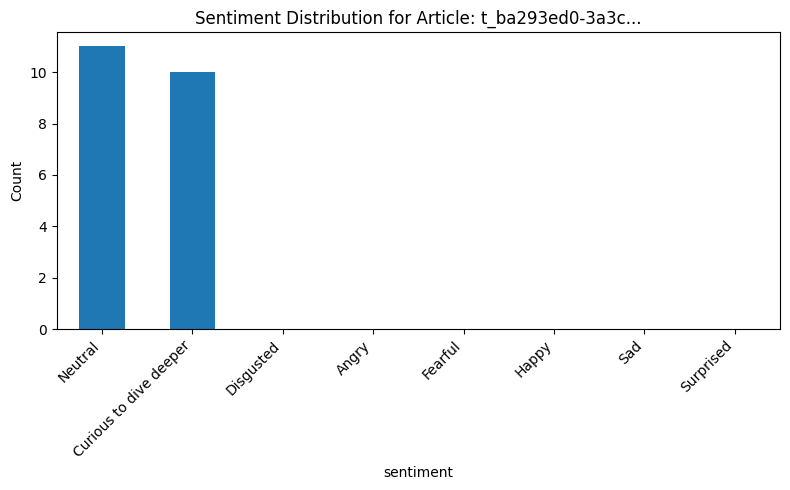

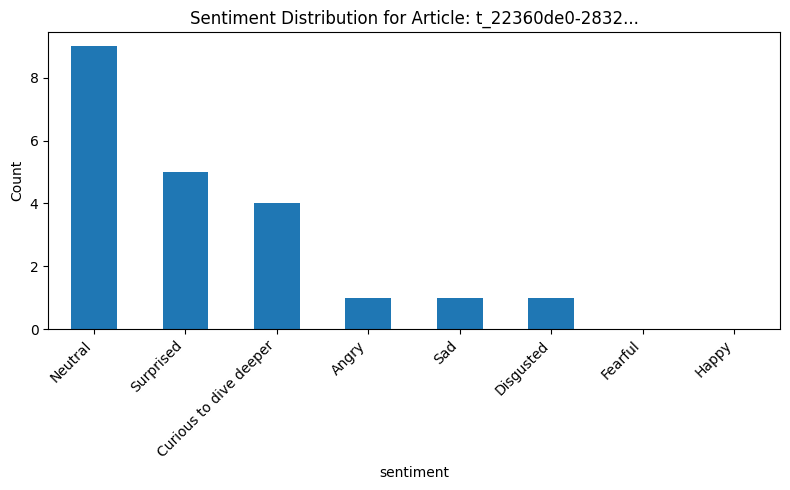

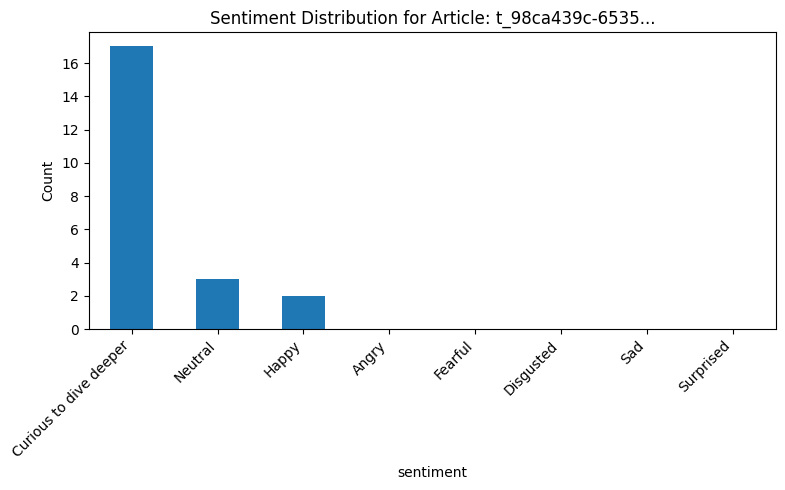

In [ ]:
# Sentiment distribution for a 3 sample articles
sample_articles_for_sentiment = article_summary.sample(min(3, len(article_summary))) 
for _, row in sample_articles_for_sentiment.iterrows():
    tid = row['transcript_id']
    article_sentiments = df_processed[df_processed['transcript_id'] == tid]['sentiment'].value_counts()
    plt.figure(figsize=(8,5))
    article_sentiments.plot(kind='bar')
    plt.title(f"Sentiment Distribution for Article: {tid[:15]}...") # Shorten ID for title
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# AGENT-WISE SUMMARIES

In [43]:
agent_summary = df_processed.groupby('agent').agg(
    total_messages=('message', 'count'),
    avg_message_length=('message_length', 'mean'),
    sentiment_mode=('sentiment', lambda x: x.mode()[0] if not x.mode().empty else 'N/A'),
    turn_rating_mode=('turn_rating', lambda x: x.mode()[0] if not x.mode().empty else 'N/A')
).reset_index()
print("\n--- Agent-wise Summary ---\n")
agent_summary.head()


--- Agent-wise Summary ---



C:\Users\haadi\AppData\Local\Temp\ipykernel_14012\4075426229.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agent_summary = df_processed.groupby('agent').agg(


,agent,total_messages,avg_message_length,sentiment_mode,turn_rating_mode
0,agent_1,6068,98.898813,Curious to dive deeper,Excellent
1,agent_2,5692,106.500351,Curious to dive deeper,Excellent


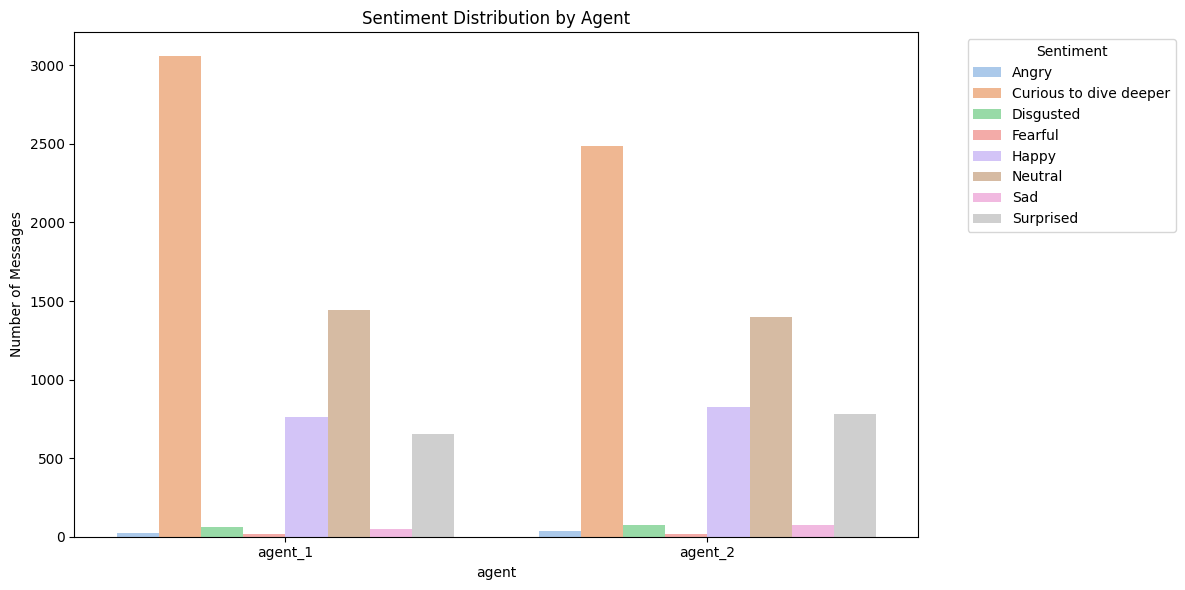

In [44]:
# Sentiment distribution per agent
plt.figure(figsize=(12, 6))
sns.countplot(data=df_processed, x='agent', hue='sentiment', palette='pastel')
plt.title('Sentiment Distribution by Agent')
plt.ylabel('Number of Messages')
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

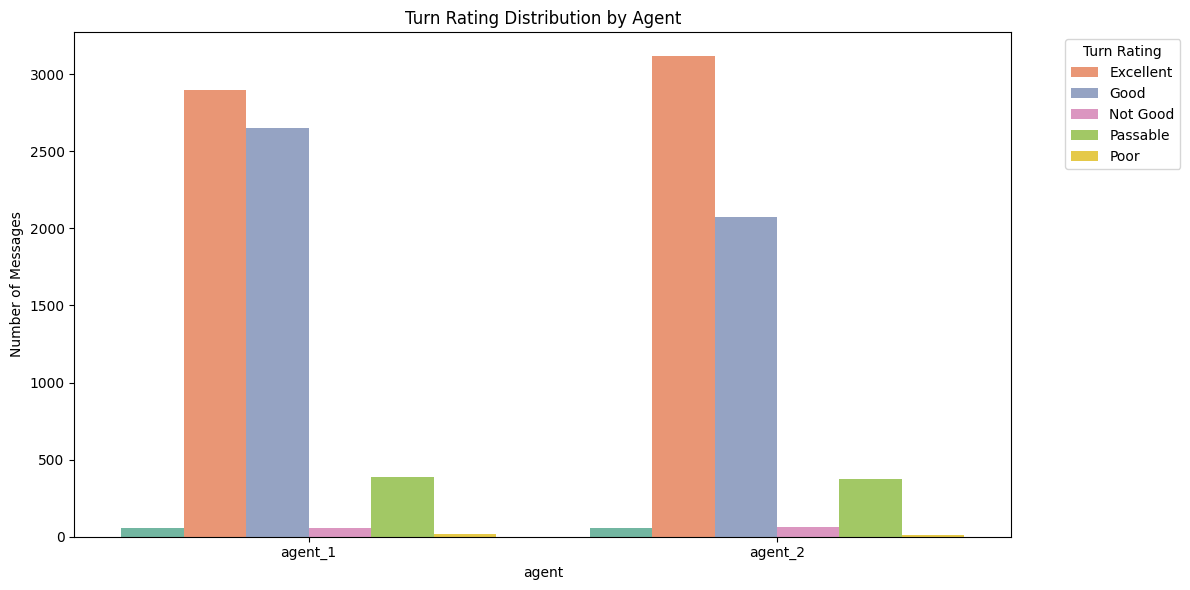

In [47]:
# Turn rating distribution per agent
plt.figure(figsize=(12, 6))
sns.countplot(data=df_processed, x='agent', hue='turn_rating', palette='Set2')
plt.title('Turn Rating Distribution by Agent')
plt.ylabel('Number of Messages')
plt.legend(title='Turn Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

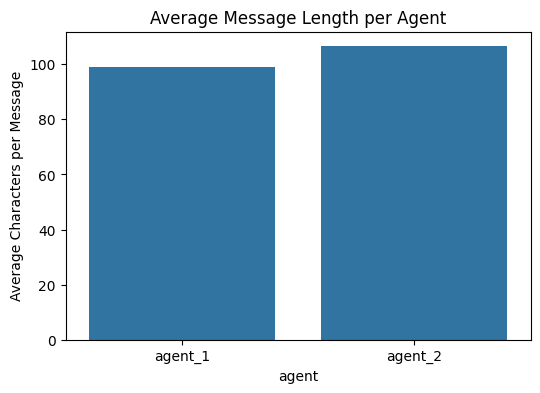

In [48]:
# Average message length per agent
plt.figure(figsize=(6, 4))
sns.barplot(data=agent_summary, x='agent', y='avg_message_length')
plt.title('Average Message Length per Agent')
plt.ylabel('Average Characters per Message')
plt.show()

In [60]:
# Knowledge Source usage per agent
agent_ks_summary_list = []
for agent_name, group in df_processed.groupby('agent'):
    ks_sum = group[ks_columns].sum()
    top_ks = ks_sum.nlargest(8).index.tolist() 
    agent_ks_summary_list.append({'agent': agent_name, 'top_knowledge_sources_agent': top_ks, 'ks_counts_agent': ks_sum.nlargest(8).values.tolist()})

agent_ks_df = pd.DataFrame(agent_ks_summary_list)
agent_ks_df.head()

C:\Users\haadi\AppData\Local\Temp\ipykernel_14012\4203438988.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for agent_name, group in df_processed.groupby('agent'):


,agent,top_knowledge_sources_agent,ks_counts_agent
0,agent_1,"[ks_FS1, ks_Personal Knowledge, ks_FS2, ks_FS3...","[1985, 1680, 1534, 1184, 665, 177, 150, 103]"
1,agent_2,"[ks_FS1, ks_FS2, ks_Personal Knowledge, ks_FS3...","[1812, 1654, 1463, 1102, 642, 213, 174, 138]"


In [61]:
print("\n--- Agent Knowledge Source Usage ---\n")
for _, row in agent_ks_df.iterrows():
    print(f"\nAgent: {row['agent']}")
    for ks, count in zip(row['top_knowledge_sources_agent'], row['ks_counts_agent']):
        print(f"  - {ks}: {count}")


--- Agent Knowledge Source Usage ---


Agent: agent_1
  - ks_FS1: 1985
  - ks_Personal Knowledge: 1680
  - ks_FS2: 1534
  - ks_FS3: 1184
  - ks_AS1: 665
  - ks_AS2: 177
  - ks_AS3: 150
  - ks_AS4: 103

Agent: agent_2
  - ks_FS1: 1812
  - ks_FS2: 1654
  - ks_Personal Knowledge: 1463
  - ks_FS3: 1102
  - ks_AS1: 642
  - ks_AS2: 213
  - ks_AS3: 174
  - ks_AS4: 138


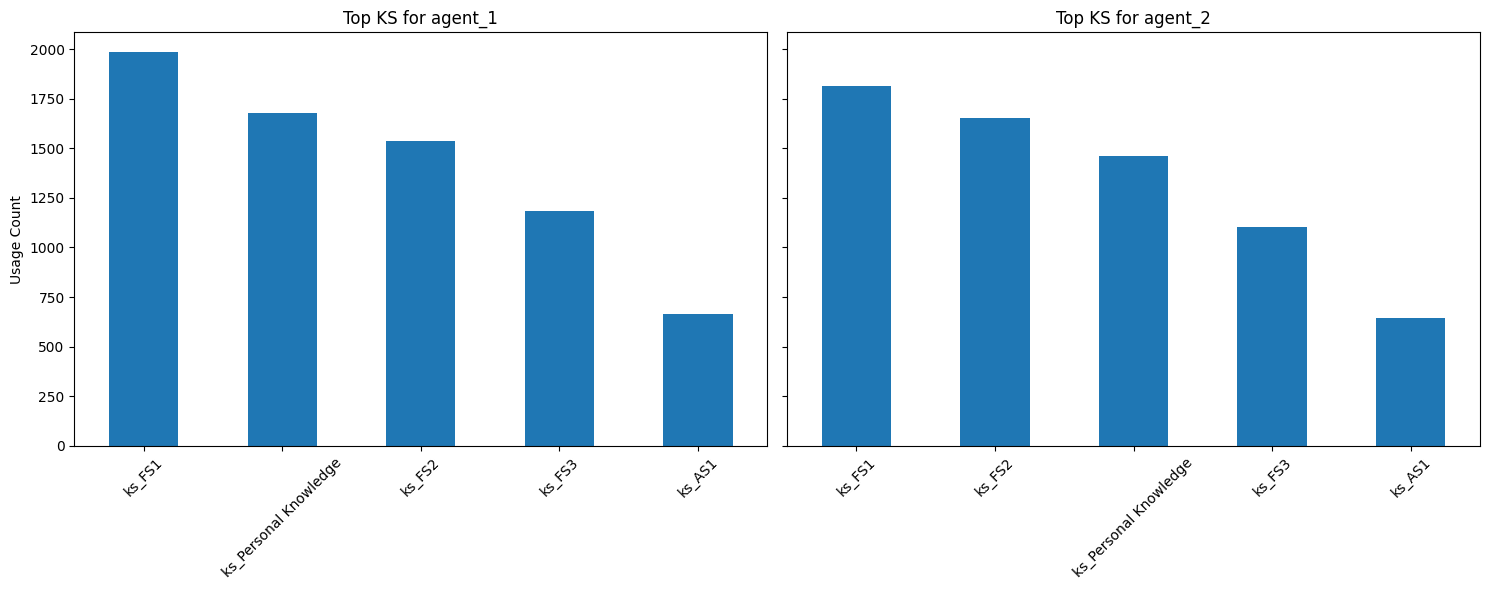

In [63]:
fig, axes = plt.subplots(1, df_processed['agent'].nunique(), figsize=(15, 6), sharey=True)
if df_processed['agent'].nunique() == 1: axes = [axes] # Handle case with only one agent

for i, agent_name in enumerate(df_processed['agent'].unique()):
    agent_data = df_processed[df_processed['agent'] == agent_name]
    ks_counts_agent = agent_data[ks_columns].sum().sort_values(ascending=False).head(5)
    ks_counts_agent.plot(kind='bar', ax=axes[i], title=f'Top KS for {agent_name}')
    axes[i].set_ylabel('Usage Count')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# INSIGHTS ON "WHAT AGENT TALK ABOUT" AND "HOW THEY TALK"

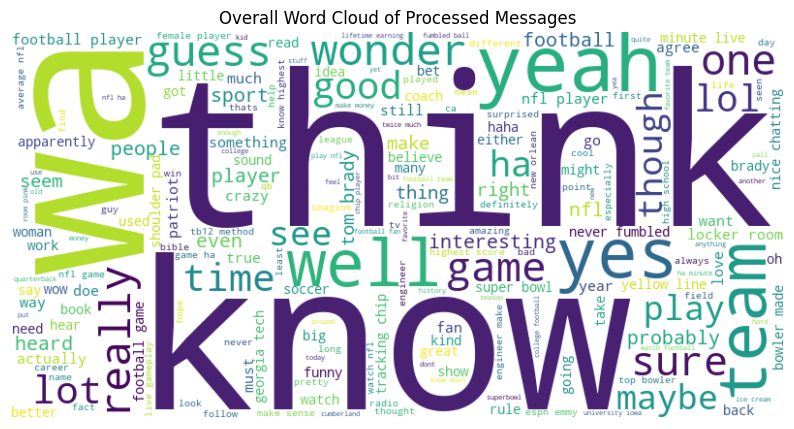

In [64]:
all_processed_text = " ".join(df_processed['message_processed'].dropna())
wordcloud_overall = WordCloud(width=800, height=400, background_color='white').generate(all_processed_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_overall, interpolation='bilinear')
plt.axis('off')
plt.title('Overall Word Cloud of Processed Messages')
plt.show()

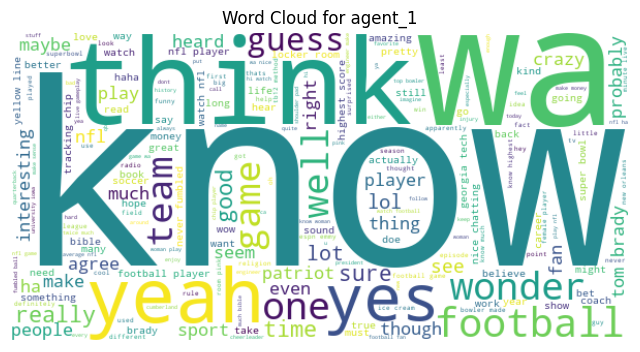

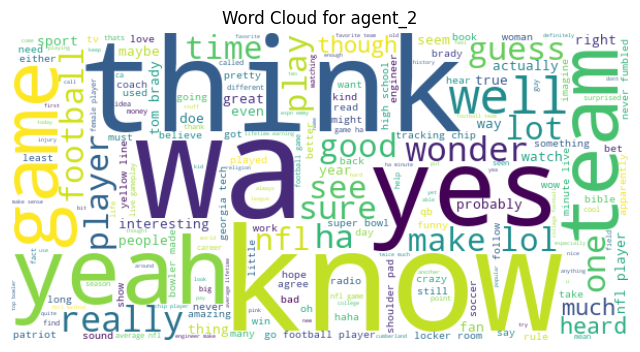

In [65]:
# Word clouds per agent
for agent_name in df_processed['agent'].unique():
    agent_text = " ".join(df_processed[df_processed['agent'] == agent_name]['message_processed'].dropna())
    if agent_text: # Ensure there's text to generate a cloud
        wordcloud_agent = WordCloud(width=600, height=300, background_color='white').generate(agent_text)
        plt.figure(figsize=(8, 5))
        plt.imshow(wordcloud_agent, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {agent_name}')
        plt.show()

In [67]:
# Analysis of question usage (counting messages with '?')
df_processed['is_question'] = df_processed['message'].str.contains(r'\?', na=False)
question_counts_per_agent = df_processed.groupby('agent')['is_question'].sum()
question_proportions_per_agent = df_processed.groupby('agent')['is_question'].mean() * 100 

print("\n--- Question Usage by Agent ---")
print("Question Counts:\n", question_counts_per_agent)
print("\nPercentage of Messages that are Questions:\n", question_proportions_per_agent)


--- Question Usage by Agent ---
Question Counts:
 agent
agent_1    2075
agent_2    1804
Name: is_question, dtype: int64

Percentage of Messages that are Questions:
 agent
agent_1    34.195781
agent_2    31.693605
Name: is_question, dtype: float64


C:\Users\haadi\AppData\Local\Temp\ipykernel_14012\1203728455.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  question_counts_per_agent = df_processed.groupby('agent')['is_question'].sum()
C:\Users\haadi\AppData\Local\Temp\ipykernel_14012\1203728455.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  question_proportions_per_agent = df_processed.groupby('agent')['is_question'].mean() * 100


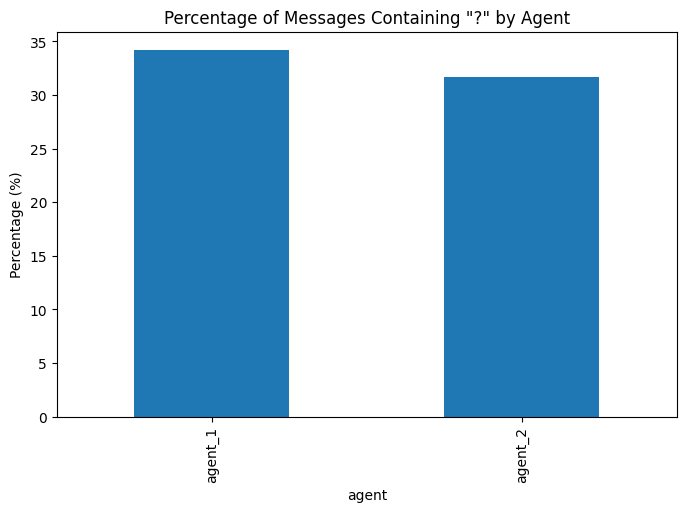

In [68]:
plt.figure(figsize=(8, 5))
question_proportions_per_agent.plot(kind='bar')
plt.title('Percentage of Messages Containing "?" by Agent')
plt.ylabel('Percentage (%)')
plt.show()